# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
from reusable import file_loader
from reusable import load
from reusable import preprocessor
import csv
import numpy as np

DISPLAY = False
AWS = False

orig_data = load.load_project_data()
greyscale_data = preprocessor.load_greyscale_train_data()
data = preprocessor.load_preprocessed_jiggered_data()

orig_X_train, orig_y_train = (orig_data.train.features, orig_data.train.labels)
orig_X_test, orig_y_test = (orig_data.test.features, orig_data.test.labels)
greyscale_X, greyscale_y = (greyscale_data.features, greyscale_data.labels)
X_train, y_train = (data.train.features, data.train.labels)
X_test, y_test = (data.test.features, data.test.labels)

if AWS is False:
  X_train = X_train[0:10000]
  y_train = y_train[0:10000]
  
def load_csv_to_dict(csv_file):
  with open(csv_file, mode='r') as infile:
    reader = csv.reader(infile)
    return {rows[0]:rows[1] for rows in reader}
  
sign_dict = load_csv_to_dict("../signnames.csv")

unique, counts = np.unique(orig_y_train, return_counts=True)
unique_grey = np.unique(greyscale_y)
# dict of original images
train_dict = {u: [] for u in unique}
grey_dict = {u: [] for u in unique}

for i in range(len(orig_X_train)):
  train_dict[orig_y_train[i]].append(orig_X_train[i])
  grey_dict[greyscale_y[i]].append(greyscale_X[i])
  
print("Done!")

Loading project data.
traffic-signs-data.zip already downloaded.
Data already unzipped.
Unpickling file train.p.
Unpickling file test.p.
Returning ProjectData(train, test).
Loading pre-preprocessed greyscale data...
Unpickling file train_greyscale_preprocessed.p.
Loading pre-preprocessed data...
Unpickling file train_jiggered_preprocessed.p.
Unpickling file test_jiggered_preprocessed.p.
Done!


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
def data_info(features_train, labels_train, feautures_test, labels_test, name):
  # Number of training examples
  n_train = len(features_train)
  # Number of testing examples.
  n_test = len(labels_train)
  # What's the shape of an traffic sign image?
  image_shape = features_train[0].shape
  # How many unique classes/labels there are in the dataset.
  n_classes = len(set(y_train))
  
  indicies, counts = np.unique(labels_train, return_counts=True)

  print(name, "number of training examples =", n_train)
  print(name, "number of testing examples =", n_test)
  print(name, "image data shape =", image_shape)
  print(name, "number of classes =", n_classes)
  print(name, "min count =", min(counts))
  print(name, "max count =", max(counts))
  
data_info(orig_X_train, orig_y_train, orig_X_test, orig_y_test, "Original")
print()
data_info(X_train, y_train, X_test, y_test, "Jiggered")

Original number of training examples = 39209
Original number of testing examples = 39209
Original image data shape = (32, 32, 3)
Original number of classes = 43
Original min count = 210
Original max count = 2250

Jiggered number of training examples = 10000
Jiggered number of testing examples = 10000
Jiggered image data shape = (32, 32, 1)
Jiggered number of classes = 43
Jiggered min count = 199
Jiggered max count = 266


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

def display_images(images, image_name, num_images, greyscale=False):
  print("Class", "`" + image_name + "`", ":", len(images), "samples.")
  fig = plt.figure(figsize = (6, 1))
  fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
  for i in range(num_images):
    axis = fig.add_subplot(1, num_images, i + 1, xticks=[], yticks=[])
    rand_index = random.randint(0, len(images[i]-1))
    if greyscale:
      axis.imshow(images[rand_index].squeeze(), cmap='gray')
    else:
      axis.imshow(images[rand_index].squeeze())
  plt.show()
  print("--------------------------------------------------------------------------------------\n")

if DISPLAY:
  for k in train_dict.keys():
    display_images(train_dict[k], sign_dict[str(k)], 10)
    display_images(grey_dict[k], sign_dict[str(k)] + " greyscale", 10, greyscale=True)
else:
  print("Only run this for display.")

Only run this for display.


In [4]:
### Count number of each sign in test and train datasets
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

def hist(data, name):
  indicies, counts = np.unique(data, return_counts=True)
  # the histogram of the data
  n, bins, patches = plt.hist(data, len(indicies), facecolor='green')

  plt.xlabel('Sign index')
  plt.ylabel('Count')
  plt.title('Count  of dataset ' + name)
  plt.axis([0, len(indicies), 0, max(counts)])
  plt.grid(True)

  plt.show()
  
def min_counts(data, num_to_print=5):
  indicies, counts = np.unique(data, return_counts=True)
  arr = sorted(list(zip(indicies, counts)), key=lambda x: x[1])
  print([(sign_dict[str(sign[0])], sign[1]) for sign in arr[0:num_to_print]])

def max_counts(data, num_to_print=5):
  indicies, counts = np.unique(data, return_counts=True)
  arr = sorted(list(zip(indicies, counts)), key=lambda x: x[1], reverse=True)
  print([(sign_dict[str(sign[0])], sign[1]) for sign in arr[0:num_to_print]])
  
if DISPLAY:
  min_counts(orig_y_train)
  max_counts(orig_y_train)
  hist(orig_y_train, 'train')

  min_counts(y_test)
  max_counts(y_test)
  hist(y_test, 'test')

  min_counts(y_train)
  max_counts(y_train)
  hist(y_train, 'jiggered train')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
#### Preprocess Steps

I have done all my preprocessing in helper files. Preprocessing was taking a long time so I found it easier to save the files as pickles than continue to reload them. My processing steps are:

1. Convert to greyscale
2. Scale between -1 and 1
3. Split out validation data

I converted the images to greyscale because Images had varying levels of brightness and contrast. COnverting to greyscale imporoved the contrast dramatically. I scaled the images between -1 and 1 because it is easier to run the optimization when the data is normally distribuated about 0 with a standard deviation of 1. I decided against using the data points in the csv file to crop the images. In looking at the images, I felt like he images had already been cropped sufficently for a Neural Network. 

In [5]:
print("Resetting data.")
train_pipeline_complete = False
test_pipeline_complete = False

data = preprocessor.load_preprocessed_jiggered_data()

X_train, y_train = (data.train.features, data.train.labels)
X_test, y_test = (data.test.features, data.test.labels)

if AWS is False:
  X_train = X_train[0:10000]
  y_train = y_train[0:10000]
  
print('Done!')

Resetting data.
Loading pre-preprocessed data...
Unpickling file train_jiggered_preprocessed.p.
Unpickling file test_jiggered_preprocessed.p.
Done!


In [6]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

### Pipeline. All this does is split data into train and validation.
# Don't run this twice
if train_pipeline_complete == False:
  print("Starting pipeline for training data.")
  X_train, y_train = shuffle(X_train, y_train)
  X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
  train_pipeline_complete = True
  print("Finished pipeline for training data.")
else:
  print("Already preprocessed train data. To re-run, reset previous cell.")

Starting pipeline for training data.
Finished pipeline for training data.


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
When looking at the graphs of the data above, I noticed there were a lot less (10X) of some images than others. I am not sure if this data is reflective of the signs on German roads or not. If it is then it may make sense to actually leave the data as is. It is possible that a data bias will result in the model "guessing" the a more popular sign when it is unsure. Biasing the model toward the most popular sign may not be the best idea. Anther way to bias the model could be by having the most signs for the most important information (Where getting the sign wrong could be the most dangerous, for example). In the end I wasn't sure what if any bias I should/could apply based on the data so I instead decided that there should be equal numbers of all signs. I first did this by limiting the dataset to the smallest number of on individual sign. This made it super fast to train the model but resulted in a low validation accuracy. After reading the Yann Lecunn paper linked above, I realized I could "jigger" the images to create more of them. In general the model shoudl be robuse to different lighting conditions and different angles and different positions in the image. With this in mind, I decided to add additional data points so all signs had the same number of data points. I did this by applying random shifts, rotations and gamma values in a range of values. The range was based on the values used in the LeCunn paper and an eye test. I ended up using the maximum individual sign count as the number of signs but I could also add even more data points by increasing this number and jiggering all sign types. 

Looking at the images, it is hard to tell what is a "jiggered" image and what isn't so I think the jiggered data is within the relm of reason. 

- Original number of training examples = 39209
- Original number of testing examples = 39209
- Original image data shape = (32, 32, 3)
- Original number of classes = 43
- Original min count = 210
- Original max count = 2250


- Jiggered number of training examples = 96750
- Jiggered number of testing examples = 96750
- Jiggered image data shape = (32, 32, 1)
- Jiggered number of classes = 43
- Jiggered min count = 2250
- Jiggered max count = 2250

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
This model is 
* CNN(stride=1, kernal=5, depth=16)
* IncpetionModule(depth=32)
* InceptionModule(depth=64)
* flattened*
* FullyConnected(depth=64) with dropout (0.7)
* FullyConnected(depth=128)
* Out (depth=10)

Based on this [article](https://hacktilldawn.com/2016/09/25/inception-modules-explained-and-implemented/.An), an  inception module is:
* CNN1 = CNN(input, stride=1, kernal=1, depth=final_depth)
* CNN2 = RELU(CNN(input, stride=1, kernal=1, depth=16))
* CNN3 = RELU(CNN(input, stride=1, kernal=1, depth=16))
* CNN4 = CNN(CNN2, string=1, kernal=3, depth=final_depth)
* CNN5 = CNN(CNN3, stride=1, kernal=5, depth=final_depth)
* POOL = MaxPool(input, stride=1, kernal=3)
* CNN6 = CNN(Pool, stride=1, keranl=1, depth=final_depth)
* => RELU(CONCAT(CNN1, CNN4, CNN5, CNN6)

In the LeCunn paper, the author mentions the results for the model got much better after the results from the first 3 layers were combined and flatened before running the fully connected layer. This sound like an eary version of an inception module to me so I decided to take the time to learn how an inception module worked and use it in this project. 


In [7]:
import tensorflow as tf

In [8]:
def fully_connected(input, size):
  weights = tf.get_variable('weights', 
    shape = [input.get_shape()[1], size],
    initializer = tf.contrib.layers.xavier_initializer()
  )
  biases = tf.get_variable('biases',
    shape = [size],
    initializer=tf.constant_initializer(0.0)
  )
  return tf.matmul(input, weights) + biases

  
def fully_connected_relu(input, size):
  return tf.nn.relu(fully_connected(input, size))
  
def conv(input, kernel_size, depth):
  weights = tf.get_variable('weights', 
    shape = [kernel_size, kernel_size, input.get_shape()[3], depth],
    initializer = tf.contrib.layers.xavier_initializer()
  )
  biases = tf.get_variable('biases',
    shape = [depth],
    initializer=tf.constant_initializer(0.0)
  )
  return tf.nn.conv2d(input, weights, strides=[1, 1, 1, 1], padding='SAME') + biases

def conv_relu(input, kernel_size, depth):
  return tf.nn.relu(conv(input, kernel_size, depth))

def pool(input, filter_size, stride_size, padding='SAME'):
  return tf.nn.max_pool(
    input, 
    ksize=[1, filter_size, filter_size, 1], 
    strides=[1, stride_size, stride_size, 1], 
    padding=padding
  )
  
def avg_pool(input, filter_size, stride_size, padding='SAME'):
  return tf.nn.avg_pool(
    input, 
    ksize=[1, filter_size, filter_size, 1], 
    strides=[1, stride_size, stride_size, 1], 
    padding=padding
  )

def inception(input, params):
  with tf.variable_scope(params.name + "_" + "conv_1x1_1"):
    conv_1x1_1 = conv(input, 1, params.final)
  with tf.variable_scope(params.name + "_" + "conv_1x1_2"):
    conv_1x1_2 = conv_relu(input, 1, params.reduce)
  with tf.variable_scope(params.name + "_" + "conv_1x1_3"):
    conv_1x1_3 = conv_relu(input, 1, params.reduce)
    
  with tf.variable_scope(params.name + "_" + "conv_3x3"):
    conv_3x3 = conv(conv_1x1_2, 3, params.final)
  with tf.variable_scope(params.name + "_" + "conv_5x5"):
    conv_5x5 = conv(conv_1x1_3, 5, params.final)
    
  with tf.variable_scope(params.name + "_" + "pool"):
    pool_1 = pool(input, 3, 1)
  with tf.variable_scope(params.name + "_" + "conv_1x1_4"):
    conv_1x1_4 = conv(pool_1, 1, params.final)
    
  return tf.nn.relu(tf.concat(3,[conv_1x1_1, conv_3x3, conv_5x5, conv_1x1_4]))

In [9]:
from tensorflow.contrib.layers import flatten

def model_pass(input, is_training, params):
  # Convolutional layers
  with tf.variable_scope('conv1'):
    conv1 = conv_relu(input, params['conv1'].kernel_size, params['conv1'].depth)
        
  with tf.variable_scope('inception1'):
    inception1 = inception(conv1, params['inception1'])
    
  with tf.variable_scope('inception2'):
    inception2 = inception(inception1, params['inception2'])  
        
  # Flatten convolutional layers output
  fc0 = flatten(inception2)
    
  # Fully connected layers
  with tf.variable_scope('fc1'):
    size = params['fc1'].size
    keep_prob = params['dropout1'].keep_prob
    fc1 = fully_connected_relu(fc0, size=size)
    fc1 = tf.cond(is_training, lambda: tf.nn.dropout(fc1, keep_prob=keep_prob), lambda: fc1)
  with tf.variable_scope('fc2'):
    fc2 = fully_connected_relu(fc1, size=params['fc2'].size)
  with tf.variable_scope('out'):
    size = params['out'].size
    prediction = fully_connected(fc2, size=size)
  return prediction

In [10]:
from reusable.batches import Batch
import os

class ModelParam:
  def __init__(self):
    print('ModelParam.__init__')
    
  def full_param_name(self):
    print('ModelParam.full_param_name')

class ConvParam(ModelParam):
  def __init__(self, name, kernel_size, depth):
    self.name = name
    self.kernel_size = kernel_size
    self.depth = depth
    
  def full_param_name(self):
    return "ck{}cd{}".format(self.kernel_size, self.depth)
  
class InceptionParam(ModelParam):
  def __init__(self, name, final, reduce):
    self.name = name
    self.final = final
    self.reduce = reduce
    
  def full_param_name(self):
    return "id{}ir{}".format(self.final, self.reduce)
  
class PoolParam(ModelParam):
  def __init__(self, name, size):
    self.name = name
    self.size = size
    
  def full_param_name(self):
    return "ps{}".format(self.size)
  
class DropoutParam(ModelParam):
  def __init__(self, name, keep_prob):
    self.name = name
    self.keep_prob = keep_prob
    
  def full_param_name(self):
    return "dp{}".format(self.keep_prob)
  
class FullyConnectedParam(ModelParam):
  def __init__(self, name, size):
    self.name = name
    self.size = size
  def full_param_name(self):
    return "fcd{}".format(self.size)
  
class BaseParam(ModelParam):
  def __init__(self, max_epochs, learning_rate, batch_size, should_train, run_tests, load_saved):
    self.max_epochs = max_epochs
    self.learning_rate = learning_rate
    self.batch_size = batch_size
    self.should_train = should_train
    self.run_tests = run_tests
    self.load_saved = load_saved
    
  def full_param_name(self):
    return "traffic_sign_classifier"
  
class Params():
  def __init__(self, params_dict, param_order):
    self.params = params_dict
    self.model_name = self._model_variable_scope(params_dict, param_order)
    self.saved_path = self._file_path()
    
  def _model_variable_scope(self, params_dict, param_order):
    model_variable_scope = "_".join([params_dict[k].full_param_name() for k in param_order]).replace(".", "-")
    print("Model name:", model_variable_scope)
    return model_variable_scope
  
  def _file_path(self):
    return os.getcwd() + "/" + self.model_name + "-model"
  
  def restore_session(self, saver, session):
    try:
      saver.restore(session, self.saved_path)
      print("Restored session!")
    except Exception as e:
        print("Failed restoring previously trained model: file does not exist.")
        print(e)
        pass
  
class EarlyStopping(): 
    def __init__(self, saver, session, patience = 30):
        self.patience = patience
        self.saver = saver
        self.session = session
        self.best_monitored_value = np.inf
        self.best_monitored_epoch = 0
        self.restore_path = None

    def __call__(self, value, epoch):
        if value < self.best_monitored_value:
            self.best_monitored_value = value
            self.best_monitored_epoch = epoch
            self.restore_path = self.saver.save(self.session, os.getcwd() + "/early_stopping_checkpoint")
        elif self.best_monitored_epoch + self.patience < epoch:
            if self.restore_path != None:
                self.saver.restore(self.session, self.restore_path)
            else:
                print("ERROR: Failed to restore session")
            return True
        
        return False

In [11]:
%matplotlib inline
from sklearn.metrics import precision_recall_fscore_support
import time

def train_model(params, X_train, y_train, X_valid, y_valid, X_test, y_test):
  model_shape = X_train[0].shape
  num_keypoints = len(set(y_test))
  graph = tf.Graph()
  start = time.time()
  
  with graph.as_default():
    tf_x_batch = tf.placeholder(tf.float32, shape = (None, model_shape[0],  model_shape[1], model_shape[2]))
    tf_y_batch = tf.placeholder(tf.int32, shape = (None))
    is_training = tf.placeholder(tf.bool)
    one_hot_y_batch = tf.one_hot(tf_y_batch, num_keypoints)
    current_epoch = tf.Variable(0, trainable=False)
    learning_rate = tf.train.exponential_decay(params.params['base'].learning_rate, 
                                             current_epoch, 
                                             decay_steps = params.params['base'].max_epochs, 
                                             decay_rate = 0.01)
    
    # Training computation.
    with tf.variable_scope(params.model_name):
      logits = model_pass(tf_x_batch, is_training, params.params)

    # This is what is run when training
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y_batch)
    loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
    training_operation = optimizer.minimize(loss_operation)
      
    # This is what is run to evaluate the model
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y_batch, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

  with tf.Session(graph = graph) as session:
    # Initialise all variables in the graph
    session.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    early_stopping = EarlyStopping(tf.train.Saver(), session)
    
    def evaluate(X_data, y_data, batch_size):
      batch = Batch(batch_size, X_data, y_data)
      total_accuracy = 0
      total_loss = 0
      for batch_x, batch_y in batch.iterator():
          [accuracy, loss] = session.run([accuracy_operation, loss_operation], feed_dict={tf_x_batch: batch_x, tf_y_batch: batch_y, is_training: False})
          total_accuracy += (accuracy * len(batch_x))
          total_loss += (loss * len(batch_x))
      return (total_accuracy / len(X_data), total_loss / len(X_data))

    def evaluate_precision_recall(X_data, y_data, batch_size):
      y_pred = []
      batch = Batch(batch_size, X_data, y_data)
      for batch_x, batch_y in batch.iterator():
        batch_y_pred = session.run(tf.argmax(logits, 1), feed_dict={tf_x_batch: batch_x, tf_y_batch: batch_y, is_training: False})
        y_pred.append(batch_y_pred)

      y_pred = np.concatenate(y_pred)    
      precision, recall, f1_score, label_count = precision_recall_fscore_support(y_data, y_pred)

      plt.plot(range(len(precision)), precision, marker='o', color='r')
      plt.plot(range(len(precision)), recall, marker='o', color='g')
      plt.plot(range(len(precision)), f1_score, marker='o', color='b')
      plt.show()
    
    if params.params['base'].load_saved:
      params.restore_session(saver, session)
    
    if params.params['base'].should_train:
      print("Training...")
      print()
      for epoch in range(params.params['base'].max_epochs):
          current_epoch = epoch
          X_train, y_train = shuffle(X_train, y_train)
          batch = Batch(params.params['base'].batch_size, X_train, y_train)
          for batch_x, batch_y in batch.iterator(): 
              session.run(training_operation, feed_dict={
                tf_x_batch: batch_x, 
                tf_y_batch: batch_y, 
                is_training: True
              })

          valid_accuracy, valid_loss = evaluate(X_valid, y_valid, params.params['base'].batch_size)
          train_accuracy, train_loss = evaluate(X_train, y_train, params.params['base'].batch_size)
          print("EPOCH {} ...".format(epoch+1))
          print("Validation Accuracy = {:.3f}".format(valid_accuracy))
          print("Validation Loss = {:.3f}".format(valid_loss))
          print()
          print("Train Accuracy = {:.3f}".format(train_accuracy))
          print("Train Loss = {:.3f}".format(train_loss))
          print()


          if early_stopping(valid_loss, epoch): 
              print("Early stopping.\nBest monitored loss was {:.8f} at epoch {}.".format(
                  early_stopping.best_monitored_value, early_stopping.best_monitored_epoch
              ))
              break
    
    evaluate_precision_recall(X_valid, y_valid, params.params['base'].batch_size)
    valid_accuracy, valid_loss = evaluate(X_valid, y_valid, params.params['base'].batch_size) 
    train_accuracy, train_loss = evaluate(X_train, y_train, params.params['base'].batch_size) 
    print("=============================================")
    print(" Train loss: %.8f, accuracy = %.2f%%)" % (train_loss, train_accuracy)) 
    print(" Valid loss: %.8f, accuracy = %.2f%%)" % (valid_loss, valid_accuracy)) 
    if params.params['base'].run_tests:
      test_accuracy, test_loss = evaluate(X_test, y_test, params.params['base'].batch_size)
      print(" Test loss: %.8f, accuracy = %.2f%%)" % (test_loss, test_accuracy))
    else:
        print("Not running model on test data right now.") 
    print(" Total time: {}".format(start - time.time()))
    print("  Timestamp: {}".format(time.time()))
        
    saved_path = saver.save(session, params.saved_path)
    print("Model saved to", saved_path)

Model name: ck5cd8_id8ir8_id16ir8_fcd8_dp0-5_fcd10_fcd43_traffic_sign_classifier
Training...

EPOCH 1 ...
Validation Accuracy = 0.021
Validation Loss = 3.771

EPOCH 2 ...
Validation Accuracy = 0.022
Validation Loss = 3.772



/Users/kyledorman/anaconda/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


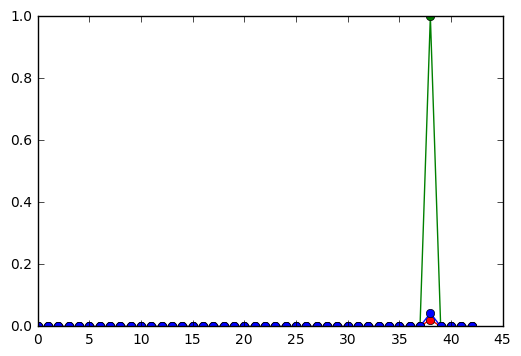

 Train loss: 3.76509429, accuracy = 0.03%)
 Valid loss: 3.77166234, accuracy = 0.02%)
Not running model on test data right now.
 Total time: -189.22319102287292
  Timestamp: 1485128326.419993
Model saved to /Users/kyledorman/Documents/carnd/CarND-Traffic-Sign-Classifier-Project/iterations/ck5cd8_id8ir8_id16ir8_fcd8_dp0-5_fcd10_fcd43_traffic_sign_classifier-model.ckpt


In [16]:
local_params = {
  'conv1': ConvParam("conv1", 5, 8),
  'inception1': InceptionParam("inception1", 8, 8),
  'inception2': InceptionParam("inception2", 16, 8),
  'fc1': FullyConnectedParam('fc1', 8),
  'dropout1': DropoutParam('dropout1', 0.5),
  'fc2': FullyConnectedParam('fc2', 10),
  'out': FullyConnectedParam('out', 43),
  'base': BaseParam(max_epochs=2, learning_rate=0.01, batch_size=4, 
                    should_train=True, run_tests=False, load_saved=False)
}

aws_params = {
  'conv1': ConvParam("conv1", 5, 16),
  'inception1': InceptionParam("inception1", 32, 16),
  'inception2': InceptionParam("inception2", 64, 16),
  'fc1': FullyConnectedParam('fc1', 64),
  'dropout1': DropoutParam('dropout1', 0.7),
  'fc2': FullyConnectedParam('fc2', 128),
  'out': FullyConnectedParam('out', 43),
  'base': BaseParam(max_epochs=2, learning_rate=0.001, batch_size=16, 
                    should_train=True, run_tests=False, load_saved=False)
}

param_order = ['conv1', 'inception1', 'inception2', 'fc1', 'dropout1', 'fc2', 'out', 'base']

if AWS:
  params = Params(aws_params, param_order)
  train_model(params, X_train, y_train, X_valid, y_valid, X_test, y_test)
else:
  params = Params(local_params, param_order)
  train_model(params, X_train, y_train, X_valid, y_valid, X_test, y_test)

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** 
I used the AdamOptamizer for this project. It seemed to work fine, although I did not spend the time to test a different optamizer. My batch size was very small, 16. I am not sure if I just had too many model paramameters or too large of a model but I struggled to fit my model in the AWS p2 GPU with anything larger (32, 64 ect). I tested different epoch sizes and felt like a max of 100 was a good size, but also allowed the model to stop early once the validation accuracy started to decrease within a threshold. I used the xavier_initializer to initialize the weights and set the initial biases to 0. My inital learning rate was 0.001 but I used a the tensorflow decay function so that learning rate would get smaller as the model progressed.

Other hyperparameters include the depths of different layers, the size of some kernals in my CNNs, and my dropout rate between the two fully connected layers. I stared with dropouts around 0.5 but prograssivly moved it up to 0.7 as I seemed to get better results this way. I chose a first kernal size of 5 because that is what the paper did. From there I think the inception module provides an easy way to guarentee I get good results for different kernal sizes. 

I liked working with the inception module because it created a way for me to have less hypter paraemters to deal with. 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
I definetly user a process of trial and error for this project. I stated with the LeNet5 architicture as a baseline. This was iteration 0. This actually had a very good success rate around 95% on the validation set. I could have continued to tweek the depth parameters of the model and maybe gotten a better score. 

I then read the LeCunn paper and tried to reimpliment thier model. This was a pretty good model. I initally wanted to get rid of the max pooling and add dropout. I wanted to get rid of the max pooling because seems to be falling out of favor. I also wanted to add dropout because this is a good way to prevent over fitting. For this iteration fo the model, I ended up needing to add pooling to reduce my model size. The last part of the LeCunn paper talked about using the results from the first 3 CNN layers in the fuly connected layer. The paper also said this had a significant positive effect on the final result. To me this sounded like an early days inception module so I decided to create a new version with inception modules. 

After reading this [article](https://hacktilldawn.com/2016/09/25/inception-modules-explained-and-implemented/) and looking at the GooLeNet architechture, I decided to replace my middle two CNNs with inception modules. This felt right beause it still used a model about the size of the LeCunn moel but added a more sophisticated inception module. More trial and error is need to decide if that is the right solution. 

From there, I continued to tweak the model hyperparameters through trial and error. 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Loading web image data.
Already created web image file.
Unpickling file web_images.p.
Returning web_images as ProjectDataSet(features, labels).
Converting image #0 to greyscale.
Web image  0 : Speed limit (20km/h)


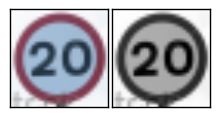

Web image  1 : Speed limit (30km/h)


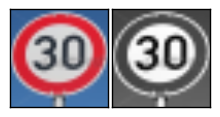

Web image  2 : Speed limit (50km/h)


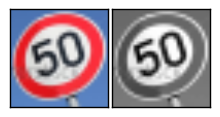

Web image  3 : Speed limit (60km/h)


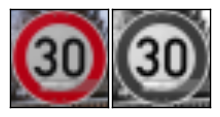

Web image  4 : Speed limit (70km/h)


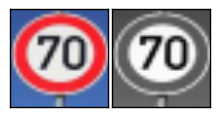

Web image  5 : Speed limit (80km/h)


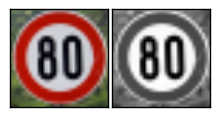

Web image  6 : End of speed limit (80km/h)


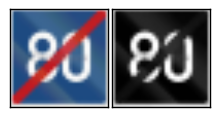

Web image  7 : Speed limit (100km/h)


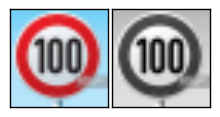

Web image  8 : Speed limit (120km/h)


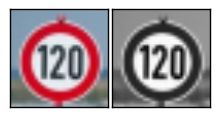

Web image  9 : No passing


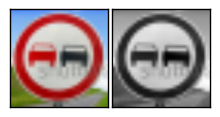

Web image  10 : No passing for vehicles over 3.5 metric tons


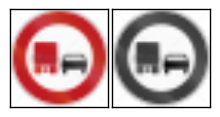

Web image  11 : Right-of-way at the next intersection


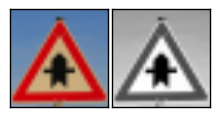

Web image  12 : Priority road


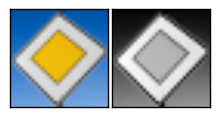

Web image  13 : Yield


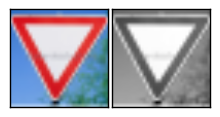

Web image  14 : Stop


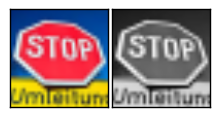

Web image  15 : No vehicles


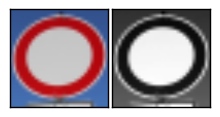

Web image  16 : Vehicles over 3.5 metric tons prohibited


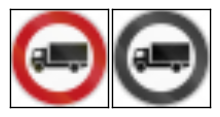

Web image  17 : No entry


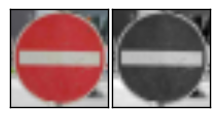

Web image  18 : General caution


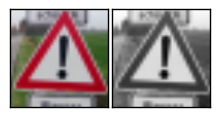

Web image  19 : Dangerous curve to the left


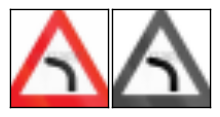

Web image  20 : Dangerous curve to the right


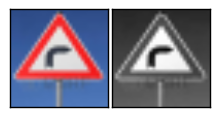

Web image  21 : Double curve


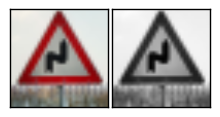

Web image  22 : Bumpy road


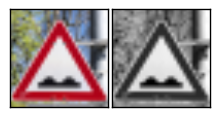

Web image  23 : Slippery road


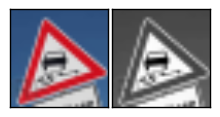

Web image  24 : Road narrows on the right


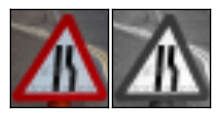

Web image  25 : Road work


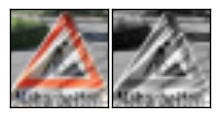

Web image  26 : Traffic signals


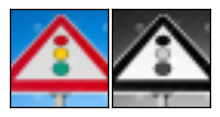

Web image  27 : Pedestrians


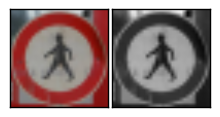

Web image  28 : Children crossing


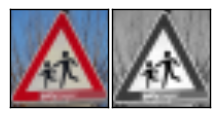

Web image  29 : Bicycles crossing


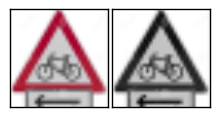

Web image  30 : Beware of ice/snow


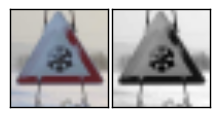

Web image  31 : Wild animals crossing


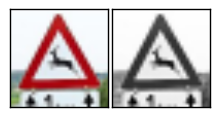

Web image  32 : End of all speed and passing limits


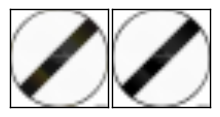

Web image  33 : Turn right ahead


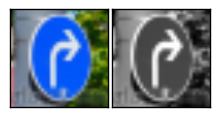

Web image  34 : Turn left ahead


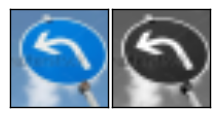

Web image  35 : Ahead only


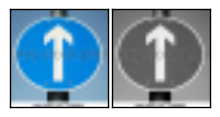

Web image  36 : Go straight or right


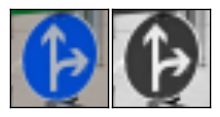

Web image  37 : Go straight or left


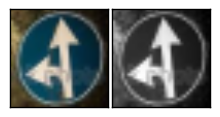

Web image  38 : Keep right


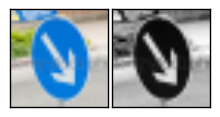

Web image  39 : Keep left


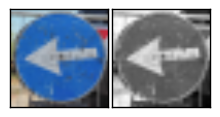

Web image  40 : Roundabout mandatory


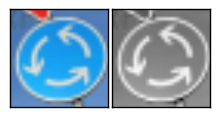

Web image  41 : End of no passing


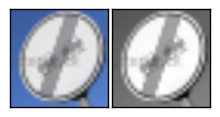

Web image  42 : End of no passing by vehicles over 3.5 metric tons


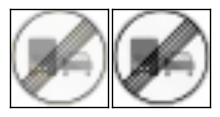

In [17]:
### Load the images and plot them here.
import matplotlib.pyplot as plt
%matplotlib inline
from reusable import web_images_loader 

DISPLAY = True

def plot_web_images(web_images, web_image_labels, grey_web_images):
  for i in range(len(web_images)):
    print("=======================")
    print("Web image ", web_image_labels[i], ":", sign_dict[str(web_image_labels[i])])
    fig = plt.figure(figsize = (2, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    axis1 = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
    axis2 = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
    axis1.imshow(web_images[i].squeeze())
    axis2.imshow(grey_web_images[i].squeeze(), cmap='gray')
    plt.show()

if DISPLAY:
  web_images = web_images_loader.load()
  web_image_labels = web_images.labels
  web_images = web_images.features
  grey_web_images = preprocessor.to_greyscale(web_images)
  X_web_image_data, y_web_image_data = preprocessor.preprocess(web_images, web_image_labels)
  plot_web_images(web_images, web_image_labels, grey_web_images)
  

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
The images I found are mostly very high quality and have great contrast to thier backgrounds. There are a few that have some parts of the sign image covered or are not an exact match to the images provided in the project. These could be good ot test on. 
- End of speed limit (80km/h) [6]
- Road work [25]
- Beware of ice/snow [30]
- Turn right ahead [33]
- Turn left ahead [34]
- Keep right [38]
- End of no passing [42]

Model name: ck5cd8_id8ir8_id16ir8_fcd8_dp0-5_fcd10_fcd43_traffic_sign_classifier
Restored session!


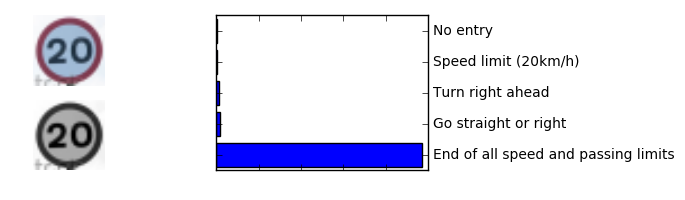

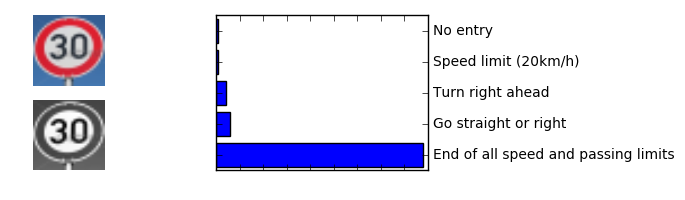

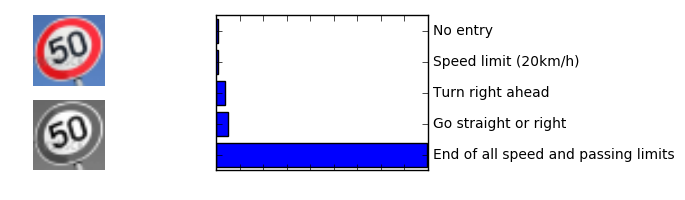

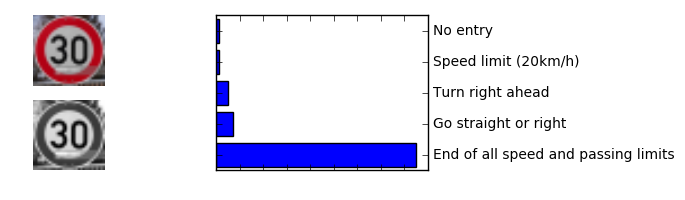

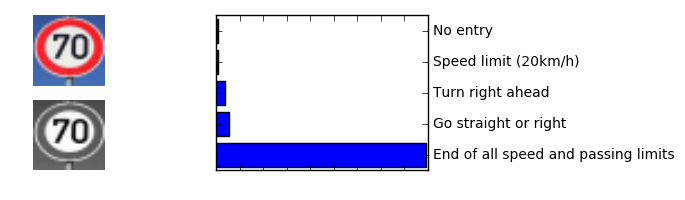

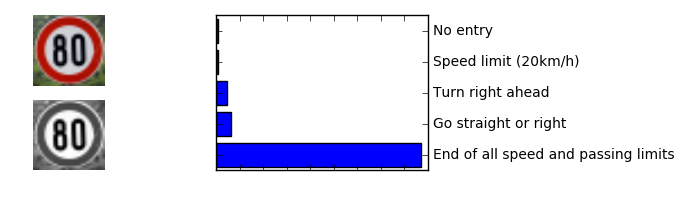

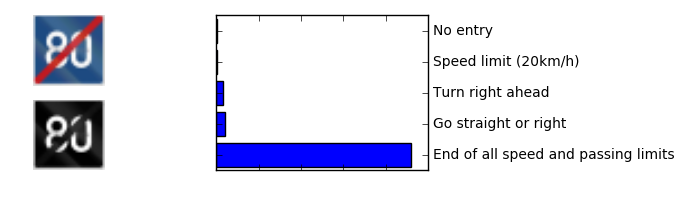

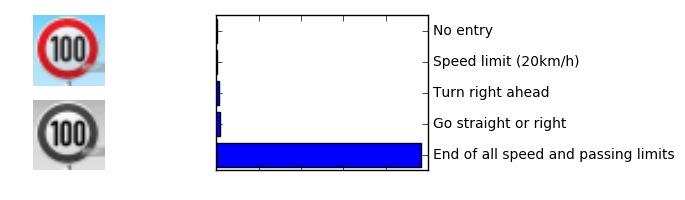

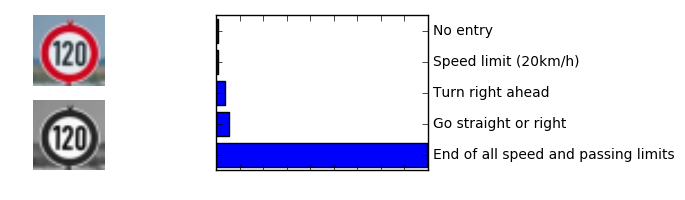

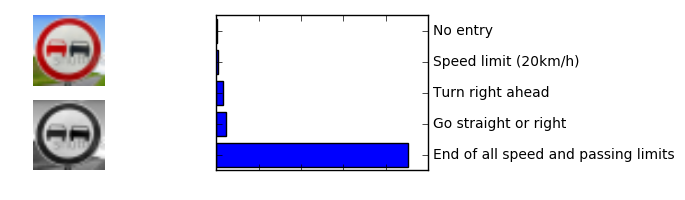

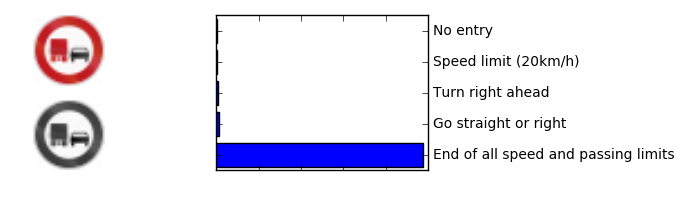

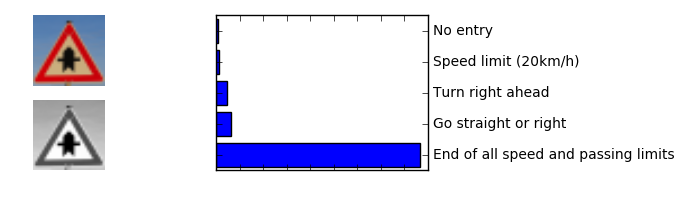

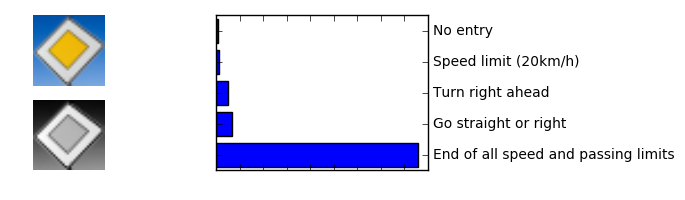

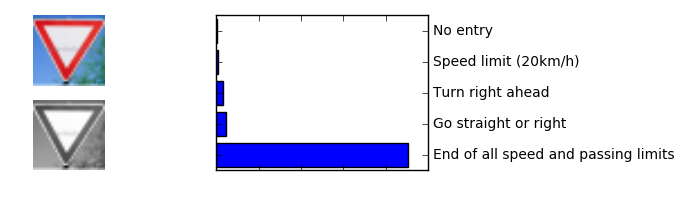

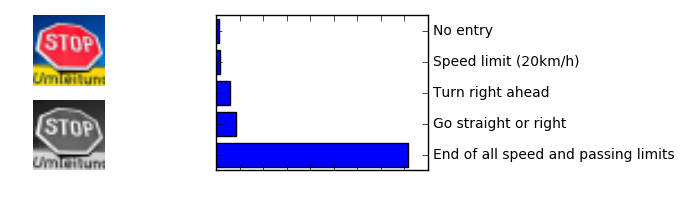

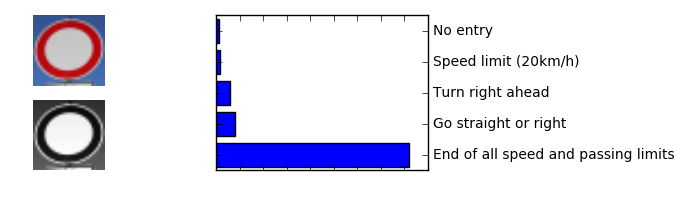

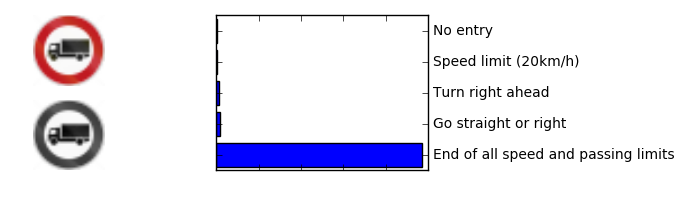

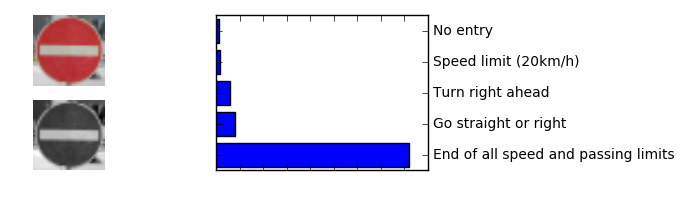

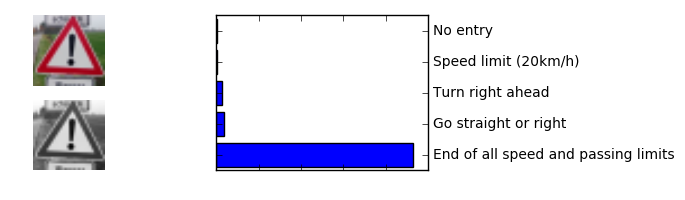

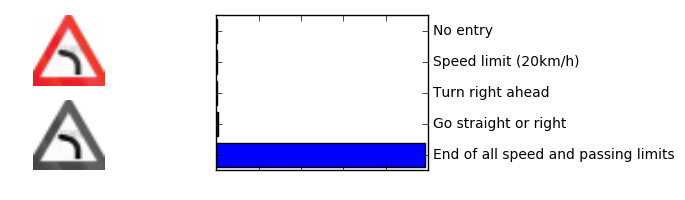

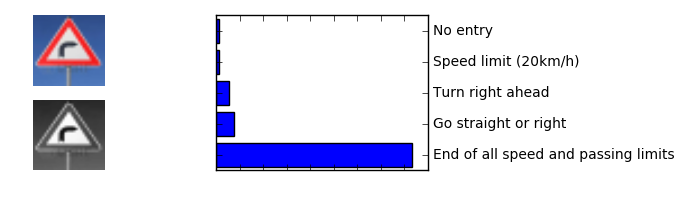

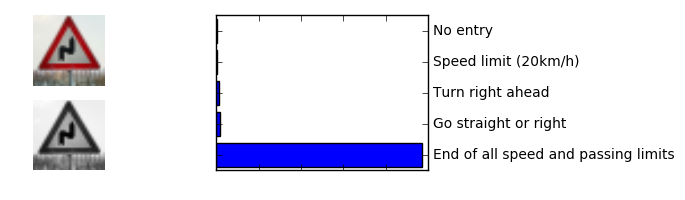

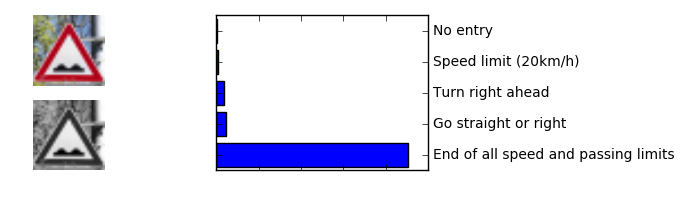

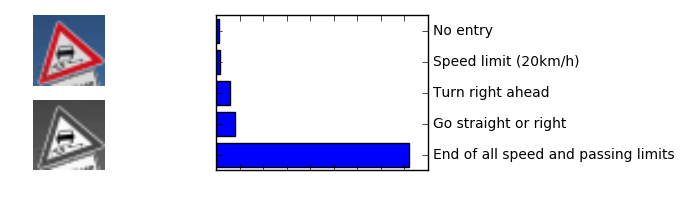

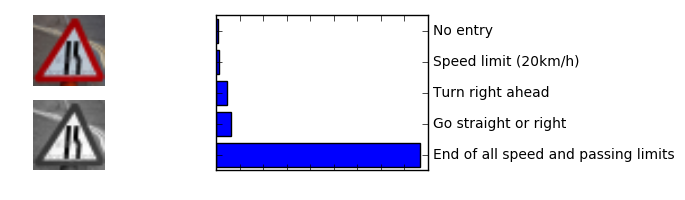

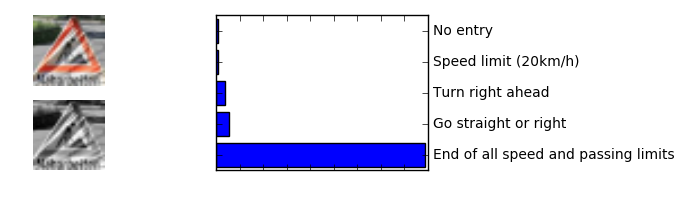

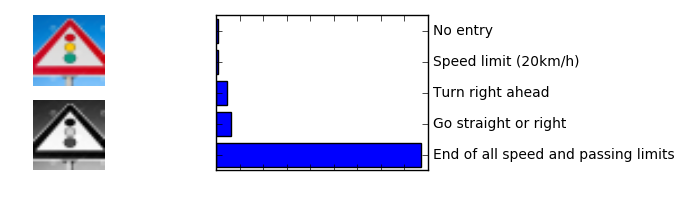

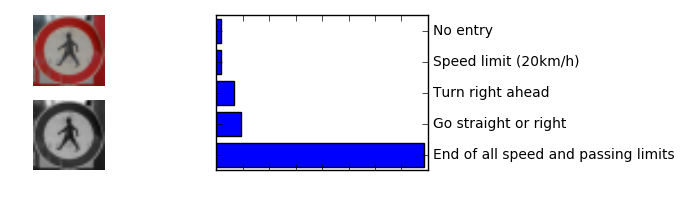

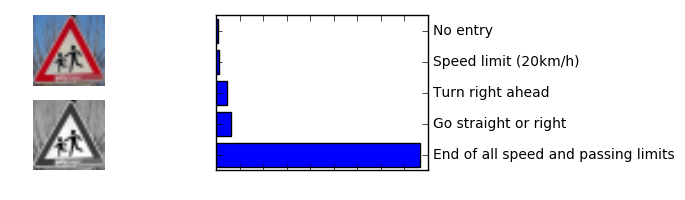

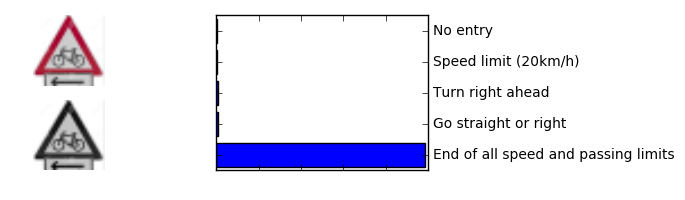

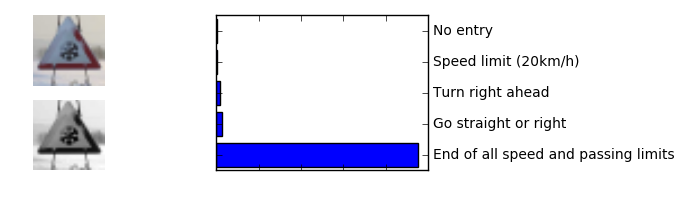

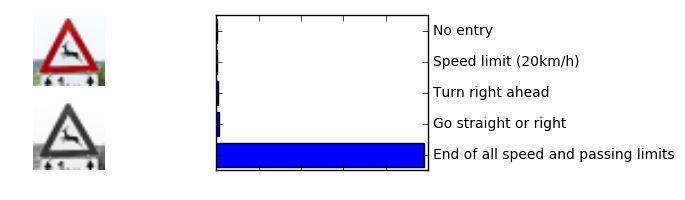

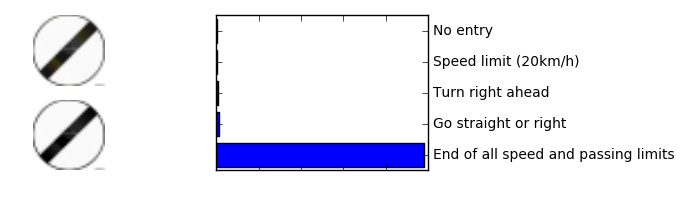

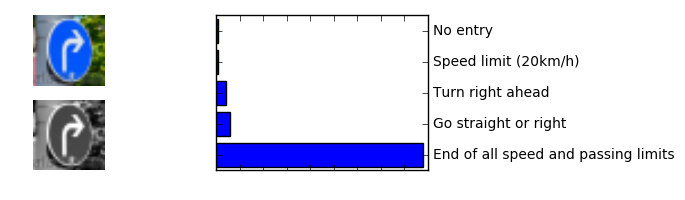

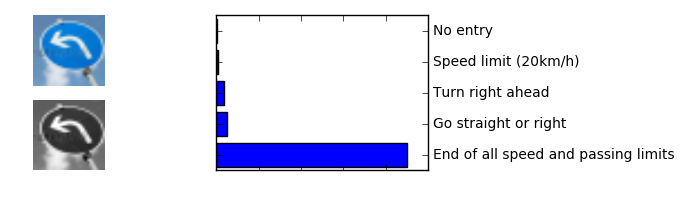

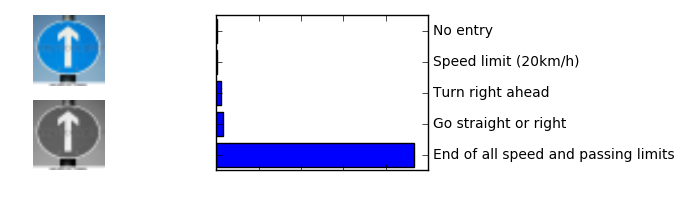

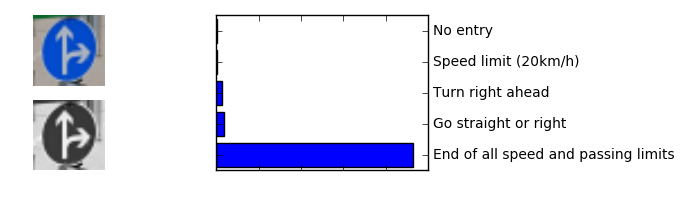

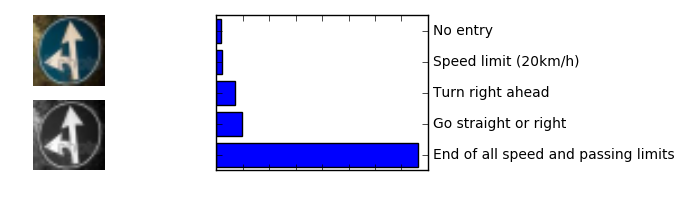

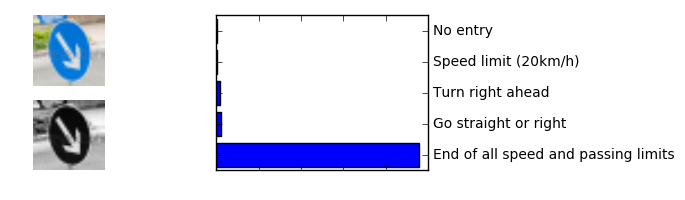

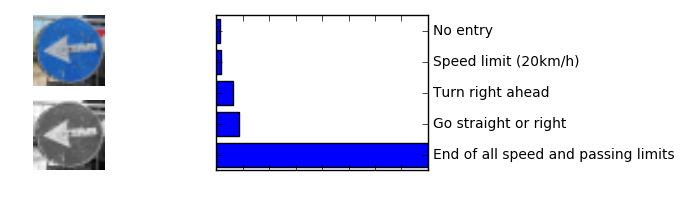

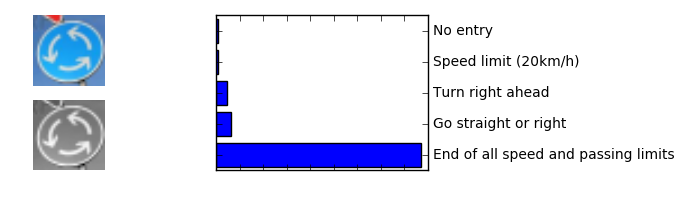

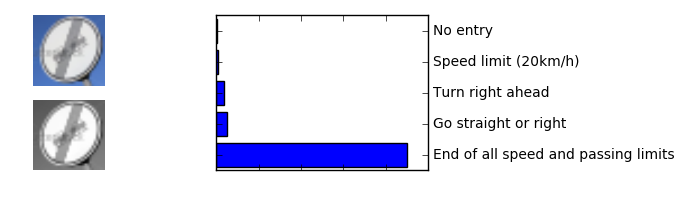

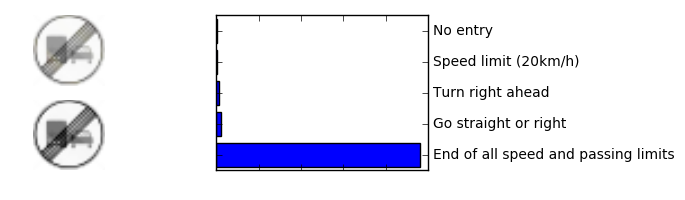

Web image accuracy = 2.326


In [45]:
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import LabelBinarizer

def get_predictions(params, features, labels):
    graph = tf.Graph()
    model_shape = X_train[0].shape
    
    with graph.as_default():
      tf_x_batch = tf.placeholder(tf.float32, shape = (None, model_shape[0],  model_shape[1], model_shape[2]))
      is_training = tf.placeholder(tf.bool)
      
      with tf.variable_scope(params.model_name):
        predictions = tf.nn.softmax(model_pass(tf_x_batch, is_training, params.params))

    with tf.Session(graph = graph) as session:
        session.run(tf.global_variables_initializer())
        params.restore_session(tf.train.Saver(), session)
        batch = Batch(params.params['base'].batch_size, features, labels)
        all_predictions = []
        for batch_x, batch_y in batch.iterator():  
          batch_predictions = session.run(predictions, feed_dict = {tf_x_batch: batch_x, is_training: False})
          all_predictions.append(batch_predictions)

        all_predictions = np.concatenate(all_predictions)
        top_5 = session.run(tf.nn.top_k(all_predictions, 5))
        return top_5, all_predictions
     
def evaluate_web_images(start=0, stop=43):
  web_image_params = params.params
  web_image_params['base'] = BaseParam(max_epochs=0, learning_rate=0.001, batch_size=16, 
                      should_train=False, run_tests=False, load_saved=True)
  web_params = Params(web_image_params, param_order)

  top_5, predictions = get_predictions(params, X_web_image_data[start:stop], y_web_image_data[start:stop])
  
  for i in range(start, stop):
    index = web_image_labels.index(y_web_image_data[i])
    plot_web_image_prediction(web_images[index], grey_web_images[index], y_web_image_data[i], top_5[0][i-start], top_5[1][i-start])

  onehot_labels = LabelBinarizer().fit_transform(y_web_image_data)
  correct_prediction = np.equal(np.argmax(predictions, 1), np.argmax(onehot_labels[start:stop], 1))
  accuracy = np.mean(correct_prediction)
  
  print("Web image accuracy = {:.3f}%".format(accuracy * 100.0))
  
def plot_web_image_prediction(orig, grey_image, value, pred_percent, pred_labels):
  # Prepare the grid
  plt.figure(figsize = (6, 2))
  gridspec.GridSpec(2, 2)

  # Plot original image
  plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=1)
  plt.imshow(orig.squeeze())
  plt.axis('off')

  # Plot preprocessed image
  plt.subplot2grid((2, 2), (1, 0), colspan=1, rowspan=1)
  plt.imshow(grey_image.squeeze(), cmap='gray')
  plt.axis('off')

  # Plot predictions
  plt.subplot2grid((2, 2), (0, 1), colspan=1, rowspan=2)
  plt.barh(np.arange(5)+.5, pred_percent, align='center')
  plt.yticks(np.arange(5)+.5, [sign_dict[str(label)] for label in pred_labels])
  plt.tick_params(axis='both', which='both', labelleft='off', labelright='on', labeltop='off', labelbottom='off')

  plt.show()
  
if DISPLAY:
  evaluate_web_images()


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

TODO

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.